In [4]:
#Name : Shrinidhi Nayak


In [20]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#DATA EXPLORATION

In [3]:
#Read a CSV file from a URL and store its contents in a variable called "data_1"
data_1=pd.read_csv("http://bit.ly/w-data")
data_1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#The shape reveals the number of rows (instances) and columns (features) available in the dataset.
data_1.shape


(25, 2)

In [8]:
#generate descriptive statistics of a dataset named "data_1". 
#The descriptive statistics provide valuable insights into the distribution, central tendency, and variability of the data.
data_1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#The "data_1.info()" command provides valuable information about the dataset called "data_1."
# It typically displays details such as the column names, data types, and the number of non-null values for each column. 
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# DATA VISUALIZATION 

<Axes: title={'center': 'hours/scores'}, xlabel='Hours', ylabel='Scores'>

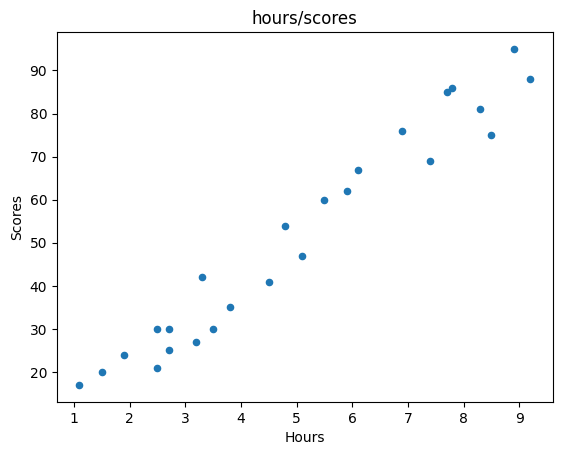

In [11]:
#The plot displays the relationship between the 'Hours' and 'Scores' variables.
data_1.plot(kind='scatter',xlabel='Hours',ylabel='Scores',x='Hours',y='Scores',title='hours/scores')

In [14]:
#Calculates the Pearson correlation coefficient between the columns of data_1.
#The method='pearson' parameter specifies the calculation of the Pearson correlation coefficient.
data_1.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
#'hours=data_1['Hours']' extracts the 'Hours' column from 'data_1' and assigns it to the variable 'hours'
#'scores=data_1['Scores']' extracts the 'Scores' column from 'data_1' and assigns it to the variable 'scores'.
hours=data_1['Hours']
scores=data_1['Scores']

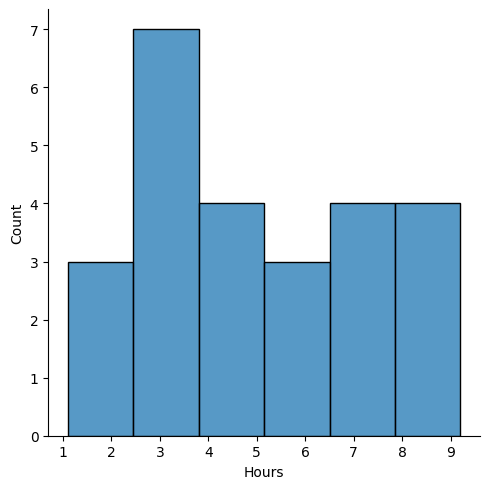

In [21]:
#generates a distribution plot using the seaborn library. 
#The plot visualizes the distribution of values in the variable "hours" along the x-axis, while the y-axis represents the density or frequency of occurrence.
sns.displot(hours)

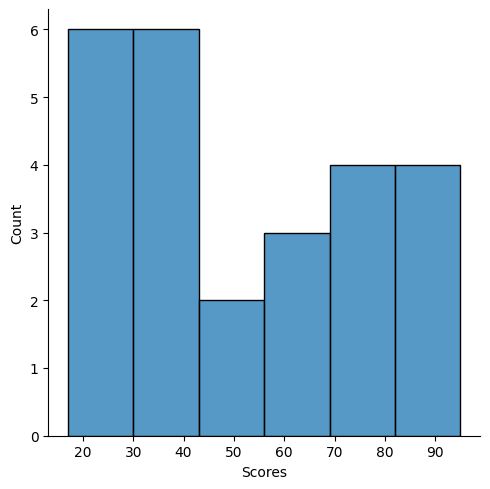

In [23]:
#The plot visualizes the distribution of values in the variable "scores" along the x-axis, while the y-axis represents the density or frequency of occurrence.
sns.displot(scores)

In [24]:
#To separate the input features (x) and the corresponding output or target variable (y) from a DataFrame.
x=data_1.iloc[:,:-1].values
y=data_1.iloc[: ,1].values

In [25]:
#Sets up a linear regression model, splits the data into training and testing sets, and then trains the model using the training data. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

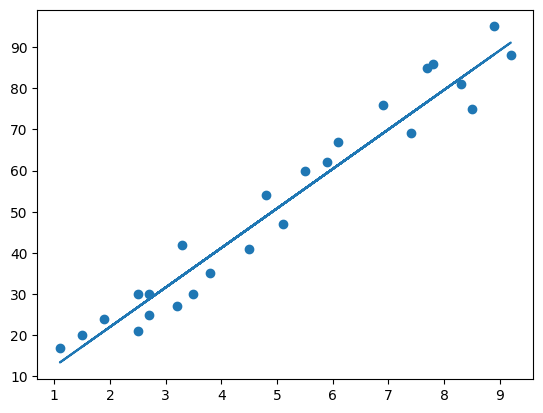

In [26]:
#performs linear regression, calculates the regression line, and visualizes it along with the data points using matplotlib.
m=reg.coef_
c=reg.intercept_
line=m*x + c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [28]:
#performing a prediction using a regression model and creating a DataFrame to compare the predicted values ('y_pred') with the actual values ('y_test').
y_pred=reg.predict(x_test)
actual_pred=pd.DataFrame({'target': y_test,'prediction':y_pred})
actual_pred

,target,prediction
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


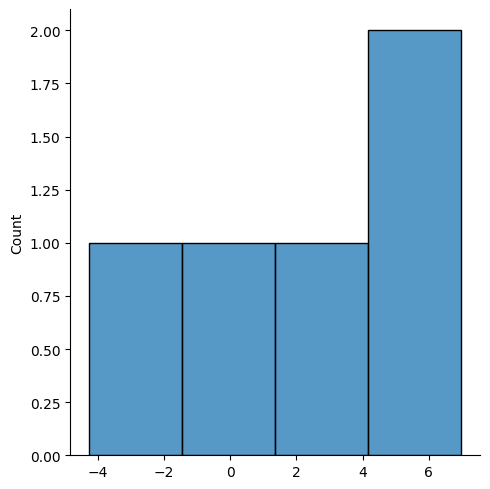

In [30]:
#It creates a distribution plot to display the differences between the predicted values (y_pred) and the actual values (y_test).
sns.displot(np.array(y_test-y_pred))

In [32]:
#Predict the percentage scored by a student based on the number of hours they study.
H=9.25
S=reg.predict([[H]])
print("if the student studies for {} hours then the percentage scored by him will be{} %.".format(H,S))

if the student studies for 9.25 hours then the percentage scored by him will be[91.56986604] %.


In [33]:
#MODEL EVALUATION 
from sklearn import metrics
from sklearn.metrics import r2_score
print('MEAN ABS ERROR:',metrics.mean_absolute_error(y_test,y_pred))

MEAN ABS ERROR: 4.5916495300630285


In [34]:
print('R2_SCORE:',r2_score(y_test,y_pred))

R2_SCORE: 0.971014141329942
